# KNN Regression

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import neighbors
from itertools import product
from sklearn.model_selection import cross_val_score
%matplotlib inline

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

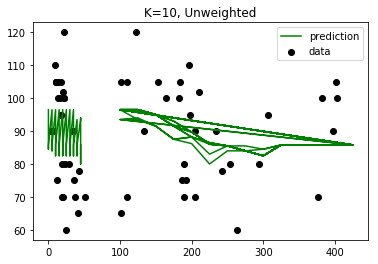

In [2]:
# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = music[['loudness', 'duration']].values  
Y = [(x, x) for x in music.bpm.values]
knn.fit(X, Y)

# Set up our prediction line.
PREDICT_LOUDNESS = np.arange(0, 50, 5)
PREDICT_DURATION = np.arange(100, 450, 25)
T = [(x, y) for x in PREDICT_LOUDNESS for y in PREDICT_DURATION]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

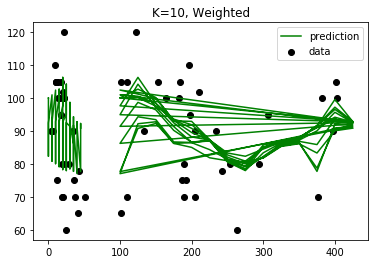

In [3]:
# Run the same model, this time with weights.
# Build our model.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights="distance")
X = music[['loudness', 'duration']].values  
Y = [(x, x) for x in music.bpm.values]
knn_w.fit(X, Y)

# Set up our prediction line.
PREDICT_LOUDNESS = np.arange(0, 50, 5)
PREDICT_DURATION = np.arange(100, 450, 25)
T = [(x, y) for x in PREDICT_LOUDNESS for y in PREDICT_DURATION]

# Trailing underscores are a common convention for a prediction.
Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

## Evaluating Models

In [4]:
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.42 (+/- 0.78)
Weighted Accuracy: -0.26 (+/- 0.74)
